# Problem statement

A user wants to sell his/her car and does not know which price to use

In [2058]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

# Prepare dataset

Read dataset
Format column names
Get numerical and categorical columns
Fix categorical values

In [2059]:
df = pd.read_csv("data.csv")

df.columns in an Index type, similar to Series, we can use the same methods

In [2060]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2061]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [2062]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [2063]:
# df['number_of_doors'] = df['number_of_doors'].astype('str')

In [2064]:
categorical_baseline = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'datetime64[ns]')].index)
numerical_baseline = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'datetime64[ns]')].index)
numerical_baseline.remove('msrp')
target = 'msrp'

In [2065]:
categorical_baseline

C:\Users\MARCOS\anaconda3\envs\mlzoomcamp\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [2066]:
numerical_baseline

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [2067]:
for category in categorical:
    df[category] = df[category].str.lower().str.replace(' ', '_')

In [2068]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# EDA

df.head()  
df.describe()  
df.describe(include='object') for categorical  

Then, for each column  
    df[col].unique()  
    df[col].nunique()  
    df.isnull().sum() isna is the same 
    
For target: sns.hisplot()  
    Fix long tail  
Fix Nans  

In [2069]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [2070]:
df.describe().round(2)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.00,11845.00,11884.00,11908.00,11914.00,11914.00,11914.00,11914.00
mean,2010.38,249.39,5.63,3.44,26.64,19.73,1554.91,40594.74
std,7.58,109.19,1.78,0.88,8.86,8.99,1441.86,60109.10
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,170.00,4.00,2.00,22.00,16.00,549.00,21000.00
50%,2015.00,227.00,6.00,4.00,26.00,18.00,1385.00,29995.00
75%,2016.00,300.00,6.00,4.00,30.00,22.00,2009.00,42231.25
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [2071]:
df.describe(include='object')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [2072]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [2073]:
for column in df.columns:
    print(column)
    print(f'num of uniques: {df[column].nunique()}')
    print(f'first 10 uniques: {df[column].unique()[0:10]}')
    print(f'number of nans: {df[column].isna().sum()}')
    print()

make
num of uniques: 48
first 10 uniques: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']
number of nans: 0

model
num of uniques: 914
first 10 uniques: ['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']
number of nans: 0

year
num of uniques: 28
first 10 uniques: [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]
number of nans: 0

engine_fuel_type
num of uniques: 10
first 10 uniques: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']
number of nans: 3

engine_hp
num of uniques: 356
first 10 uniques: [335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
number of nans: 69

engine_cylinders
num of uniques: 9
first 10 uniques: [ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
numbe

Check distribution of target. bin = "number of bars". It is a long tail distribution. Peak on 1K likely that that is the minimum amount in the platform

<AxesSubplot:xlabel='msrp', ylabel='Count'>

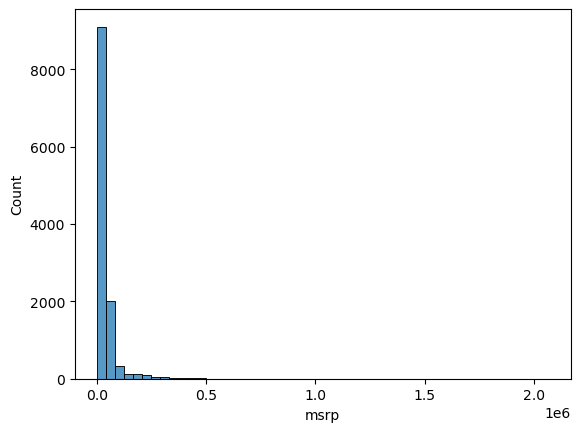

In [2074]:
sns.histplot(df[target], bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

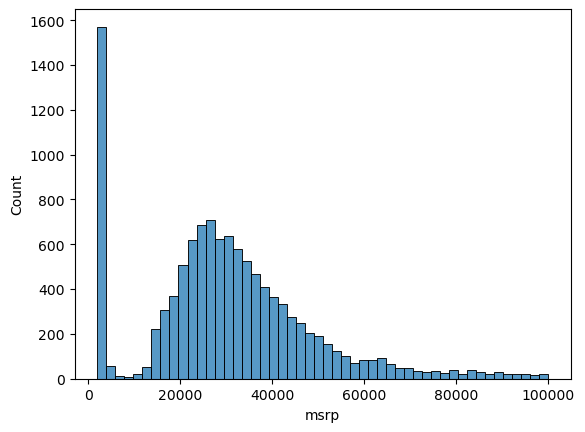

In [2075]:
sns.histplot(df[target][df[target] < 100000], bins=50)

Get rid of the long tail. Use log. This will be done in the preprocess data section

In [2076]:
price_logs = np.log1p(df[target])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

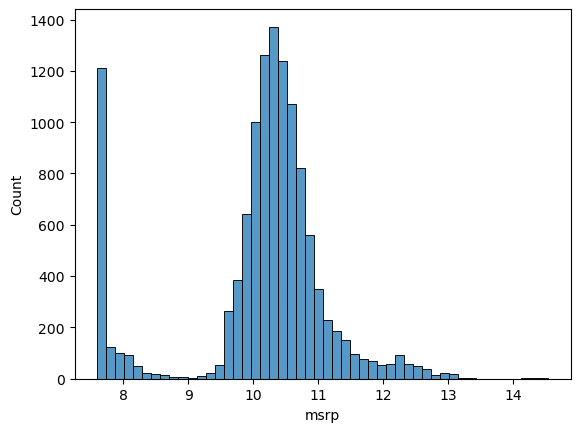

In [2077]:
sns.histplot(price_logs, bins=50)

# Preprocess data


Log of target values and Nans to zeros (better option would use the mean)

In [2078]:
features_baseline = numerical_baseline
target = 'msrp'

In [2079]:
# df_target is actually a series.
def preprocess_features(df, numerical, target):
    df = df.copy()
    df[numerical] = df[numerical].fillna(0)
    df_target = np.log1p(df[target])
    del(df[target])
    return df[numerical], df_target

In [2080]:
features_baseline

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

# Setup validation framework

In [2081]:
np.random.seed(2)
val_split = 0.2
test_split = 0.2
n = len(df)
n_val = int(n * val_split)
n_test = int(n * test_split)
n_train = n - n_val - n_test
n, n_train, n_val, n_test
index = np.arange(n)
np.random.shuffle(index)

In [2082]:
# reset_index: do not use inplace here. We want a new dataframe and keep dp

In [2083]:
def train_val_test_split(df, index):

    df_train = df.iloc[index[:n_train]].reset_index(drop=True)
    df_val = df.iloc[index[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[index[n_train+n_val:]].reset_index(drop=True)
    return df_train.values, df_val.values, df_test.values

Create y (np arrays)

In [2084]:
df_train

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,2015,185.0,4.0,4.0,34,27,2202
1,1991,162.0,5.0,4.0,20,16,3105
2,2006,203.0,6.0,4.0,25,18,5657
3,2015,268.0,4.0,4.0,25,19,640
4,2016,131.0,4.0,4.0,26,24,2009
...,...,...,...,...,...,...,...
7145,2014,560.0,10.0,2.0,20,13,1158
7146,2016,170.0,4.0,4.0,36,25,873
7147,2001,170.0,4.0,2.0,28,22,204
7148,2010,173.0,4.0,4.0,30,21,1013


# Linear regression

X shall have x0=1

w = (Xt X)^1 * Xt *y

In [2085]:
numerical_baseline

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [2086]:
df_features, df_target = preprocess_features(df, numerical_baseline, target)

In [2087]:
df_features

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,2011,335.0,6.0,2.0,26,19,3916
1,2011,300.0,6.0,2.0,28,19,3916
2,2011,300.0,6.0,2.0,28,20,3916
3,2011,230.0,6.0,2.0,28,18,3916
4,2011,230.0,6.0,2.0,28,18,3916
...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204
11910,2012,300.0,6.0,4.0,23,16,204
11911,2012,300.0,6.0,4.0,23,16,204
11912,2013,300.0,6.0,4.0,23,16,204


In [2088]:
df_target

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

In [2089]:
X_train, X_val, X_test = train_val_test_split(df_features, index)
y_train, y_val, y_test =  train_val_test_split(df_target, index)

In [2090]:
df_train.values[10].round(2)

array([2.015e+03, 1.500e+02, 4.000e+00, 2.000e+00, 4.000e+01, 3.000e+01,
       8.730e+02])

In [2091]:
y_train[20]

10.554666248273572

In [2092]:
def fit(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X]) # Add x0
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [2093]:
w = fit(X_train, y_train)
w

array([-1.80852890e+02,  9.43209513e-02,  3.80316024e-03,  7.39013429e-02,
       -2.35246490e-02, -2.85786636e-03,  1.10921411e-02, -4.88810772e-05])

In [2094]:
# X: numpy array of 2D. E.g. X_train[10:11] -> shape is 1,3
def linear_regression(X, w):
    return np.column_stack([np.ones(X.shape[0]), X]).dot(w)

In [2095]:
y_pred = linear_regression(X_train[20:21], w)
# y_pred = np.expm1(y_pred)
y_pred

array([9.70774433])

In [2096]:
y_pred = linear_regression(X_train, w)
y_pred

array([ 9.45920523,  9.710962  , 10.23607704, ..., 10.73589435,
       12.12338124, 10.46736738])

<AxesSubplot:ylabel='Count'>

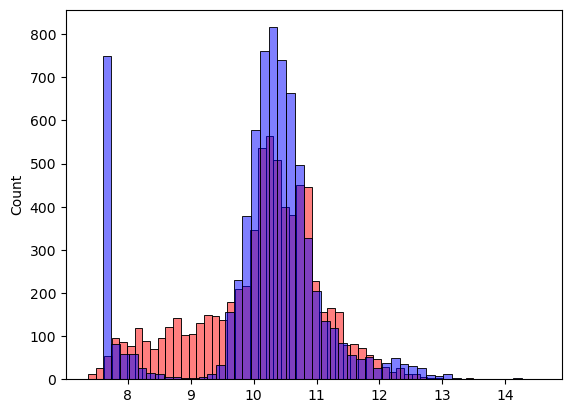

In [2097]:
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_train, bins=50, color='blue', alpha=0.5)

# Evaluate model

In [2098]:
def rmse(x,y):
    return np.sqrt(np.mean((x-y)**2))

In [2099]:
rmse_train = rmse(y_pred, y_train)
rmse_train

0.517135668281233

In [2100]:
y_pred = linear_regression(X_val, w)

In [2101]:
rmse_val = rmse(y_pred, y_val)
rmse_val

0.5168234951491002

# Feature engineering

Use a new feature, instead of using year, use the age of the car

In [2102]:
df['year'].max()

2017

In [2103]:
numerical_baseline

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [2104]:
def preprocess_features(df, numerical, target):
    
    df = df.copy()
    
    df[numerical] = df[numerical].fillna(0)
    
    df_target = np.log1p(df[target])
    del(df[target])
    
    df['age'] = df['year'].max() - df['year']
    columns = numerical + ['age']
    columns.remove('year')
    
    return df[columns], df_target, columns

In regard categorical variables, we preprocess the entire df, before splitting, because it is possible that during the process, the number of resulting columns may vary from train set to val set. For instance, the number of doors = nan is a possible value in train set but not in val set. If we process the entire dataset and split afterthat, there is no problem, we will one hot encode all possible values

In [2105]:
df_features, df_target, features = preprocess_features(df, numerical_baseline, target)
features

['engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age']

In [2106]:
X_train, X_val, X_test = train_val_test_split(df_features, index)
X_train[0]

array([ 148.,    4.,    2.,   33.,   24., 1385.,    9.])

In [2107]:
w = fit(X_train, y_train)
y_pred = linear_regression(X_val, w)
rmse_val = rmse(y_pred, y_val)
rmse_val

0.5168234951483335

Almost no improvement. Since we were already using the year

# Categorical variables

Number of doors shall be categorial. Use one hot encoding. We discard the value nan, only "2.0", "3.0", and "4.0" because "nan" is unbalanced and the result will be worse. It we use all makers we will have overfitting. If we use all values of all categories or even 20 values, the inverse matrix will not exists. So we use the top 5 values of each category. We will have overfit as well. Regularization will fix all of these issues

In [2160]:
def preprocess_features(df, numerical, categorical_values, target):
    
    df = df.copy()
    
    df[numerical] = df[numerical].fillna(0)
    
    df_target = np.log1p(df[target])
    del(df[target])
    
    df['age'] = df['year'].max() - df['year']
    columns = numerical + ['age']
    columns.remove('year')
    
    for category, values in categorical_values.items():
        
        df[category] = df[category].astype(str)
        
        for value in values:
            column = f'{category}_{value}'
            df[column] = (df[category] == value).astype(int)
            columns.append(column)
        
        del(df[category])
        
    return df[columns], df_target, columns

In [2109]:
categorical_baseline.append('number_of_doors')

In [2110]:
numerical_baseline.remove('number_of_doors')

In [2161]:
categorical_values = {}
categorical = ['number_of_doors']

In [2168]:
for category in categorical:
    values = df[category].astype(str).value_counts().iloc[:10].index
    values = values[values != 'nan']
    categorical_values[category] = values

In [2169]:
categorical_values

{'number_of_doors': Index(['4.0', '2.0', '3.0'], dtype='object')}

In [2170]:
df_features, df_target, features = preprocess_features(df, numerical_baseline, categorical_values, target)

In [2171]:
features

['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age',
 'number_of_doors_4.0',
 'number_of_doors_2.0',
 'number_of_doors_3.0']

In [2172]:
X_train, X_val, X_test = train_val_test_split(df_features, index)

In [2173]:
w = fit(X_train, y_train)
y_pred = linear_regression(X_val, w)
rmse_val = rmse(y_pred, y_val)
rmse_val

0.515799564150281

Almost no improvement due to change numerical number of doors to categorical
Let's add all categories

In [2177]:
categorical_values = {}
categorical = categorical_baseline
for category in categorical:
    values = df[category].astype(str).value_counts().iloc[:10].index
    values = values[values != 'nan']
    categorical_values[category] = values

In [2179]:
df_features, df_target, features = preprocess_features(df, numerical_baseline, categorical_values, target)
X_train, X_val, X_test = train_val_test_split(df_features, index)

In [2180]:
features

['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age',
 'make_chevrolet',
 'make_ford',
 'make_volkswagen',
 'make_toyota',
 'make_dodge',
 'make_nissan',
 'make_gmc',
 'make_honda',
 'make_mazda',
 'make_cadillac',
 'model_silverado_1500',
 'model_tundra',
 'model_f-150',
 'model_sierra_1500',
 'model_beetle_convertible',
 'model_tacoma',
 'model_gti',
 'model_frontier',
 'model_beetle',
 'model_accord',
 'engine_fuel_type_regular_unleaded',
 'engine_fuel_type_premium_unleaded_(required)',
 'engine_fuel_type_premium_unleaded_(recommended)',
 'engine_fuel_type_flex-fuel_(unleaded/e85)',
 'engine_fuel_type_diesel',
 'engine_fuel_type_electric',
 'engine_fuel_type_flex-fuel_(premium_unleaded_required/e85)',
 'engine_fuel_type_flex-fuel_(premium_unleaded_recommended/e85)',
 'engine_fuel_type_flex-fuel_(unleaded/natural_gas)',
 'transmission_type_automatic',
 'transmission_type_manual',
 'transmission_type_automated_manual',
 'transmission_type_direct_drive'

In [2181]:
w = fit(X_train, y_train)
y_pred = linear_regression(X_val, w)
rmse_val = rmse(y_pred, y_val)
rmse_val

253.71722962463167

Model performance is worse. Looking at the w matrix, the values are very large. Use regularization

In [2182]:
w

array([-6.82332909e+13, -2.82158002e-01,  1.19735536e+01,  3.92343491e-01,
       -5.18291966e+00, -1.18838409e-03, -2.22873561e+00,  1.18595968e+01,
       -5.99177246e+00, -9.25249554e+00,  1.42812075e+01, -8.79950269e+00,
        3.72064229e+00, -1.22484172e+01,  1.22733575e+01,  7.73527420e+00,
        1.01237789e+01, -2.56387178e+01, -3.44723769e+01,  1.63899200e+01,
        2.00172896e+00, -1.73427841e+00, -2.53215962e+01, -3.79686884e+00,
       -5.89443429e+00,  1.50101838e+01, -1.04288326e+01,  7.05015692e+03,
        7.05555032e+03,  7.04885885e+03,  7.05505251e+03,  7.07583636e+03,
        1.38145776e+04,  7.06609792e+03,  6.89224085e+03,  6.62587480e+03,
        7.31670725e+14,  7.31670725e+14,  7.31670725e+14,  7.31670725e+14,
        7.31670725e+14, -6.63437434e+14, -6.63437434e+14, -6.63437434e+14,
       -6.63437434e+14,  2.12260517e-01, -7.36364599e+00, -2.26077585e+00,
       -4.86194295e+00, -1.50597885e+00, -4.15397812e+00, -1.82073412e+00,
       -7.81239820e-01, -

# Regularization

In [2183]:
def fit(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([np.ones(X.shape[0]), X]) # Add x0
    XTX = X.T.dot(X)
    return np.linalg.inv(XTX + r * np.eye(XTX.shape[0])).dot(X.T).dot(y)

In [2184]:
w = fit(X_train, y_train, 0.001)
y_pred = linear_regression(X_val, w)
rmse_val = rmse(y_pred, y_val)
rmse_val

0.43788740841403373

In [2185]:
w

array([ 6.23170653e+00,  1.44031642e-03,  9.03225067e-02, -6.41370146e-03,
       -8.93958271e-03, -3.21952074e-05, -9.99794927e-02, -5.94572046e-02,
        7.65519018e-02,  2.34663224e-02, -4.66358420e-03, -1.83189916e-01,
       -2.49675308e-01, -2.33003552e-02,  1.63956107e-02,  1.47716304e-02,
        1.98763819e-01, -3.02298680e-01, -6.63166342e-01, -3.19996843e-01,
       -3.44468091e-01, -2.48874775e-01, -4.45815965e-01,  1.37935151e-01,
       -3.00598262e-01, -1.79168390e-01, -8.16989615e-02, -5.43374742e-01,
       -4.62962241e-02, -3.97826387e-01, -6.50213570e-01, -1.95102738e-01,
        1.33148325e+00, -3.95674195e-02, -3.44923914e-01, -3.12196637e-01,
        1.34269884e+00,  1.15934921e+00,  1.34229987e+00,  1.64493980e+00,
        7.42875603e-01,  1.54092175e+00,  1.53331113e+00,  1.56238513e+00,
        1.59502606e+00, -1.10114469e-01,  1.43732634e-01, -1.13218062e-01,
       -1.29992862e-01, -4.61063175e-02, -1.24409410e-01, -1.21741439e-01,
       -7.40390244e-02,  

# Tuning the model

In [2186]:
for r in np.logspace(1,-5,7):
    w = fit(X_train, y_train, r)
    y_pred = linear_regression(X_val, w)
    rmse_val = rmse(y_pred, y_val)
    print(f'r={r}. rmse_val={rmse_val:.4f}')

r=10.0. rmse_val=0.4511
r=1.0. rmse_val=0.4385
r=0.1. rmse_val=0.4378
r=0.01. rmse_val=0.4378
r=0.001. rmse_val=0.4379
r=0.0001. rmse_val=0.4379
r=1e-05. rmse_val=0.4379


In [2187]:
r = 0.01
y_pred = linear_regression(X_val, w)

<AxesSubplot:ylabel='Count'>

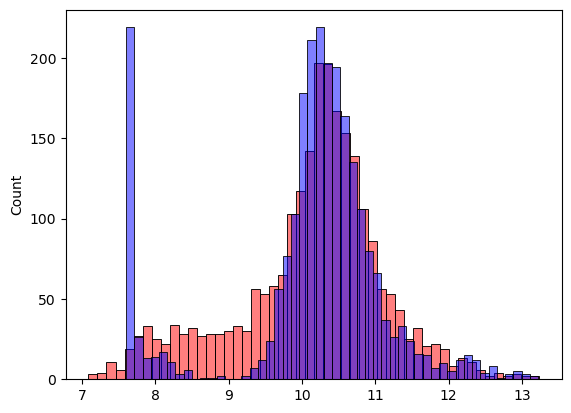

In [2188]:
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_val, bins=50, color='blue', alpha=0.5)

# Using the model

Retrain with test and val sets concatenated. Evaluate the model with test set
Test with sample. We should recompute all values of the categorical again, with the full train set. Not done yet

In [2189]:
X_full_train = np.concatenate([X_train, X_val])
y_full_train = np.concatenate([y_train, y_val])

In [2190]:
w = fit(X_full_train, y_full_train, r=0.01)
y_pred = linear_regression(X_test, w)
rmse_val = rmse(y_pred, y_test)
print(f'r={r}. rmse_val={rmse_val:.4f}')

r=0.01. rmse_val=0.4332


In [2191]:
car = df.iloc[25].to_dict()
car

{'make': 'audi',
 'model': '100',
 'year': 1993,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 172.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 24,
 'city_mpg': 17,
 'popularity': 3105,
 'msrp': 2000}

In [2192]:
example = pd.DataFrame([car])
example

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000


In [2194]:
X, y, features  = preprocess_features(example, numerical_baseline, categorical_values, target)

In [2208]:
prediction = linear_regression(X.values, w)

In [2209]:
print(prediction)

[10.33480564]
